<a href="https://colab.research.google.com/github/salidego/Talento-Tech/blob/main/1_7_Notebook_WebScraping_(Libros%2C_Otro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WEB Scraping**

### El Web Scraping es una técnica utilizada para extraer datos de sitios web de manera automática. Este proceso implica el uso de programas de software que envían solicitudes a páginas web, recuperan su contenido HTML, y extraen la información deseada, la cual puede ser almacenada y analizada posteriormente. Es una herramienta poderosa para recolectar grandes volúmenes de datos no estructurados que se encuentran en la web y transformarlos en datos estructurados para análisis, investigación, y diversas aplicaciones comerciales.

In [20]:
#Instalación de librerías python necesarias, si es requerido
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [21]:
#Importar librerías para extracción de datos web
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [22]:
#Sitio web de la extracción de datos
url         = "http://books.toscrape.com/"
response    = requests.get(url)
soup        = BeautifulSoup(response.content, 'html.parser')

In [ ]:
#ejemplo de lectura y extracción de un html con la librería BeautifulSoup
html_doc    = "<html><head><title>Example</title></head><body><p>Bienvenidos</p></body></html>"
soup        = BeautifulSoup(html_doc, 'html.parser')
print(soup.body.string)

Bienvenidos


In [23]:
#recorriendo los datos y almacenandolos en una lista
books = soup.find_all('article', class_='product_pod')#accede a la etiqueta article y la clase product_pod
book_list = [] #crea una lista vacia

for book in books: #creando estructura repetitiva for
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    book_list.append({"Title": title, "Price": price})

In [24]:
#Crear el dataframe de pandas
df_books = pd.DataFrame(book_list)
print(df_books)

                                                Title   Price
0                                A Light in the Attic  £51.77
1                                  Tipping the Velvet  £53.74
2                                          Soumission  £50.10
3                                       Sharp Objects  £47.82
4               Sapiens: A Brief History of Humankind  £54.23
5                                     The Requiem Red  £22.65
6   The Dirty Little Secrets of Getting Your Dream...  £33.34
7   The Coming Woman: A Novel Based on the Life of...  £17.93
8   The Boys in the Boat: Nine Americans and Their...  £22.60
9                                     The Black Maria  £52.15
10     Starving Hearts (Triangular Trade Trilogy, #1)  £13.99
11                              Shakespeare's Sonnets  £20.66
12                                        Set Me Free  £17.46
13  Scott Pilgrim's Precious Little Life (Scott Pi...  £52.29
14                          Rip it Up and Start Again  £35.02
15  Our 

In [ ]:
#convertir el valor en £ a dolares
# Cantidad en libras
amount_gbp = 51.77

# Tasa de cambio (1 GBP = 1.27 USD)
exchange_rate = 1.27

# Conversión a dólares
amount_usd = amount_gbp * exchange_rate

# Imprimimos el Resultado
print(f"£{amount_gbp} es igual a ${amount_usd:.2f} USD")

£51.77 es igual a $65.75 USD


In [25]:
# convierte todos los valores de la columna Price a dolares
# Elimina el símbolo de la moneda y convierte a float
df_books['Price'] = df_books['Price'].str.replace('£', '').astype(float)

# Convierte a dólares
df_books['Price (USD)'] = df_books['Price'] * exchange_rate

In [26]:
# Se redondea el precio en dolares
df_books['Price (USD)'] = df_books['Price (USD)'].round(2)
df_books.head()

,Title,Price,Price (USD)
0,A Light in the Attic,51.77,65.75
1,Tipping the Velvet,53.74,68.25
2,Soumission,50.10,63.63
3,Sharp Objects,47.82,60.73
4,Sapiens: A Brief History of Humankind,54.23,68.87


In [27]:
#Se guarda el resultado en .csv, queda en el folder temporal del drive
df_books.to_csv('books.csv', index=False)


In [28]:
#Se realiza visualización de los datos con la librería plotly
import plotly.express as px

fig = px.bar(df_books, x='Title', y='Price (USD)', title='Book Prices')
fig.show()

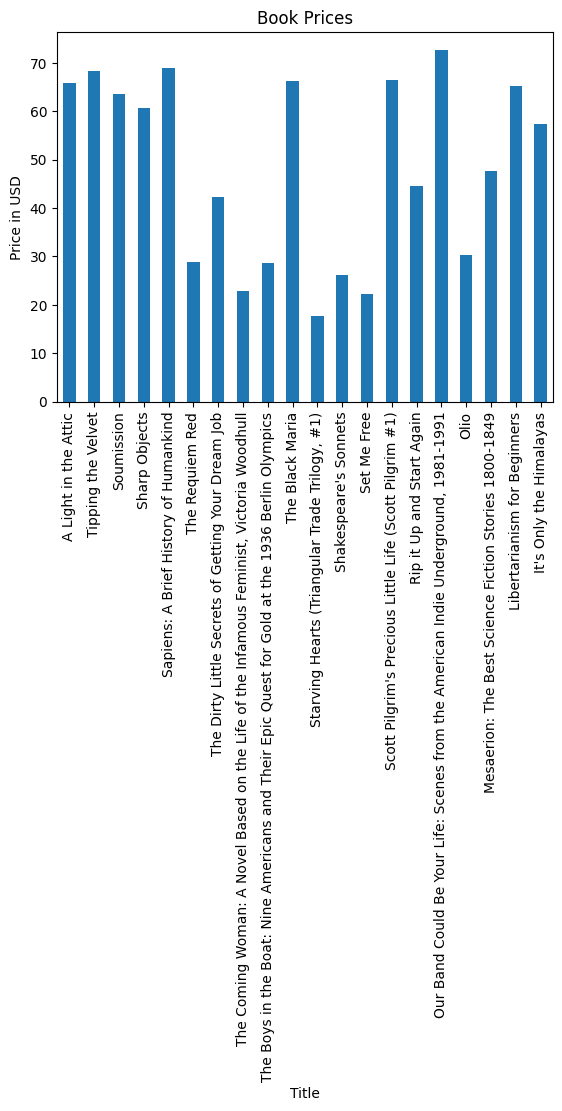

In [29]:
#Se realiza visualización de los datos con la librería matplotlib
import matplotlib.pyplot as plt

df_books.plot(kind='bar', x='Title', y='Price (USD)', legend=False)
plt.ylabel('Price in USD')
plt.title('Book Prices')
plt.xticks(rotation=90)
plt.show()

# Otros ejemplos de páginas para hacer web scraping

In [30]:
url = 'https://www.bbc.com/sport'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [31]:
headlines = soup.find_all(class_='ssrcss-1mhwnz8-Promo e1vyq2e80')
news_list = [headline.get_text() for headline in headlines]
print(news_list)

['Guardiola comes out fighting as Man City hit \'dark place\'Pep Guardiola insists he will come out fighting after Bernardo Silva says Manchester City are in a "dark placeâ\x80\x9d following three successive defeats.AttributionMan CityPosted1 hour ago1hComments176', 'Slot outshines Alonso at Anfield as dream start continuesAttributionFootballPosted1 hour ago1hComments83', "Real Madrid 'have to be worried' after second straight home lossAttributionChampions LeaguePosted3 hours ago3hComments163", "'A special touch' for Amorim as Sporting thrash Man CityAttributionMan CityPosted3 hours ago3hComments1029", 'Outstanding Celtic roar back to beat Leipzig in Champions LeagueAttributionChampions LeaguePosted2 hours ago2h', 'Embiid given three-game ban for pushing journalistAttributionBasketballPosted2 hours ago2h', 'Gauff advances at Finals with rare win over SwiatekAttributionTennisPosted10 hours ago10h', "I'm more grateful for each day - Sir Chris Hoy AttributionOlympic GamesPosted1 day ago1d

In [32]:
news_df = pd.DataFrame(news_list, columns=['Headline'])
news_df.head()

,Headline
0,Guardiola comes out fighting as Man City hit '...
1,Slot outshines Alonso at Anfield as dream star...
2,Real Madrid 'have to be worried' after second ...
3,'A special touch' for Amorim as Sporting thras...
4,Outstanding Celtic roar back to beat Leipzig i...
